<a href="https://colab.research.google.com/github/unknown-jun/Basic_of_Python/blob/master/04_Dev_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#58. 예외처리 이해하기 ④ (try~except Exception as e)

 - 코드에서 예외가 발생하면 이에 대한 자세한 내용을 파악하는것이 중요함.  
 - 파이썬은 발생 가능한 예외에 대해 exception 객체로 미리 정의해두고 있다

> http://docs.python.org/3/library/exceptions.html

- 위의 사이트에 보면 여러가지 다양한 에러에 대해서 미리 에러처리를 할 수 있도록 정의의해놓은 예외들을 확인할 수 있다.

In [4]:
# 예제 1
try:
    x = int(input('분자의 숫자를 입력하시요'))
    y = int(input('분모의 숫자를 입력하시오'))
    print(x/y)
except:
    """ 분모에 0이나 문자를 입력해도 예외처리를 통해 에러를 방지함"""
    print('잘못된 값을 입력하고 나누기를 시도하셨습니다')

분자의 숫자를 입력하시요10
분모의 숫자를 입력하시오0
잘못된 값을 입력하고 나누기를 시도하셨습니다


- 위의 경우에는 분모값을 입력할 때 숫자 0을 입력했을 때와 문자 a를 입력했을 때 똑같이 '잘못된 값을 입력하셔서 나누기를 시도하셨습니다'가 출력됨
- 좀 더 구체화해서 분모값을 0을 입력하면 '0으로 나눌 수 없습니다'가 나오고 분모값으로 a를 입력하면 '잘못된 값을 입력하셨습니다'가 나오게 하고 싶다면?

In [10]:
# 예제 2
try:
    x = int(input('분자의 숫자를 입력하시요'))
    y = int(input('분모의 숫자를 입력하시오'))
    print(x/y)
except ZeroDivisionError:
    """ 분모에 0을 입력해도 예외처리를 통해 에러를 방지함"""
    print('0으로 나눌 수 없습니다.')
except:
    """분모에 음수나 숫자가 아닌 다른 값을 입력하는 것을 예외처리함"""
    print('잘못된 값을 입력하셨습니다')

분자의 숫자를 입력하시요10
분모의 숫자를 입력하시오ㅁ
잘못된 값을 입력하셨습니다


**문제 191. 숫자를 물어보게 하고 숫자를 입력하면 해당 숫자만큼 1번부터 출력되게 하는 코드를 작성하시오.**

```
숫자를 입력하세요: 5

1
2
3
4
5
```

In [14]:
num = int(input( '숫자를 입력하세요: ' ))

for i in range( 1, num+1 ):
    print( i )

숫자를 입력하세요: 5
1
2
3
4
5


**문제 192. 위의 코드에 예외처리를 해서 숫자를 물어볼 때 문자를 입력하면 '잘못된 값을 입력하셨습니다'라고 메세지가 출력되게 하시오**

In [31]:
try:
    num1 = int(input( '숫자를 입력하세요: ' ))
    for i in range( 1, num1+1 ):
        print( i )
except:
    print( '잘못된 값을 입력하셨습니다' )

숫자를 입력하세요: ㅁ
잘못된 값을 입력하셨습니다


- 위의 코드의 경우에는 숫자를 입력할 때 알파벳 a를 넣으면 예외처리가 되어서 '잘못된 값을 입력하셨습니다.'라고만 나옴
> 에러에 대한 정확한 원인 파악이 어려움
- '잘못된 값을 입력하셨습니다' 말고도 정확한 에러애 대한 원인을 파악을 하고 싶다면?

In [30]:
try:
    num1 = int(input( '숫자를 입력하세요: ' ))
    for i in range( 1, num1+1 ):
        print( i )
except Exception as e:
    print( '잘못된 값을 입력하셨습니다' )
    print(e)  #  에러의 발생 원인을 출력해줌

숫자를 입력하세요: '
잘못된 값을 입력하셨습니다
invalid literal for int() with base 10: "'"


#59. 특정 예외처리 이해하기 5 (try ~ except 특정 예외)

 - 파이썬의 작동 상 오류가 아닌데 프로그래머의 입장에선 오류라고 판단될 시 일부러 프로그램이 작동되지 않고 오류메세지를 출력하는 경우에 사용

```
계산하는 프로그램
프로그램 코드 ........
프로그램 코드 ........   <-- 오류가 발생했으면 (파이썬 입장에선 오류가 아님)
프로그램 코드 ........  => 작동하지 않음
프로그램 코드 ........
```
- 금융권 프로그램에서는 금액이 안 맞는 프로그램이 있다면 사고로 이어지게 되므로 금액이 맞지 않으면 프로그램을 종료하는 예외처리를 할수 있다.

```
실행코드
if 어떤 조건:
    raise Exception('예외가 발생했습니다.')    # 여기서 종료
else:
    실행코드
```

**문제 193. 판다스를 이용하여 emp3.csv의 데이터를 로드하는데 이름을 물어보게 하고 이름을 입력하면 해당 사원의 이름과 월급이 출력되게 하시오!**

```
이름을 입력하세요: scott

SCOTT 3000
```

In [36]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

emp = pd.read_csv('emp3.csv')
name = input('이름을 입력하세요: ')
print(emp[['ename', 'sal']][emp['ename']==name.upper()])

Saving emp3.csv to emp3 (1).csv
이름을 입력하세요: scott
    ename   sal
11  SCOTT  3000


**문제 194. 위의 결과에서 월급만 출력하시오!**

In [37]:
import pandas as pd

emp = pd.read_csv('emp3.csv')
name = input('이름을 입력하세요: ')
print(emp['sal'][emp['ename']==name.upper()])

이름을 입력하세요: scott
11    3000
Name: sal, dtype: int64


In [42]:
import pandas as pd

emp = pd.read_csv('emp3.csv')
name = input('이름을 입력하세요: ')
result = emp['sal'][emp['ename']==name.upper()]
print(result)
print( type(result) )

이름을 입력하세요: scott
11    3000
Name: sal, dtype: int64
<class 'pandas.core.series.Series'>


In [45]:
import pandas as pd

emp = pd.read_csv('emp3.csv')
name = input('이름을 입력하세요: ')

result = emp['sal'][emp['ename']==name.upper()].values[0]  # 값을 가지고 오는 메소드
"""emp 데이터 프레임에서 어떤 특정값을 딱 하나만 출력하려면 위와 같이 작성해줘야 함"""
print(result)
print( type(result) )

이름을 입력하세요: scott
3000
<class 'numpy.int64'>


**문제 195. 위의 코드에 사용자 정의 예외처리를 해서 월급이 고소득자는 해당사원의 월급을 볼 수 없습니다.라는 메세지가 출력되게 하시오.**  
(월급이 3000 이상인 사원들을 고소득자로 보고 작성하시오)

In [51]:
import pandas as pd

emp = pd.read_csv('emp3.csv')
name = input('이름을 입력하세요: ')

result = emp['sal'][emp['ename']==name.upper()].values[0]
if result >= 3000:
    raise Exception('해당 사원의 월급은 볼 수 없습니다.')  #  월급이 3000이라면 에러를 발생시켜 프로그램을 종료시킴
else:
    print(emp[['ename', 'sal']][emp['ename']==name.upper()])

이름을 입력하세요: smith
    ename  sal
10  SMITH  800


**문제 196. 위의 코드를 수정해서 이름을 물어보게 하고 이름과 직업을 출력하는 코드로 작성하는데 직업이 SALESMAN이면 "해당 사원의 정보는 볼수 없습니다." 라는 메세지가 출력되면서 프로그램이 종료되게 하시오**

In [54]:
import pandas as pd

emp = pd.read_csv("emp3.csv")
name = input('이름을 입력하세요: ')

result = emp['job'][emp['ename'] == name.upper()].values[0]
if result == 'SALESMAN':
    raise Exception('해당 사원의 정보는 볼 수 없습니다.')
else:
    print(emp[['ename', 'sal']][emp['ename'] == name.upper()])

이름을 입력하세요: king
  ename   sal
0  KING  5000


#60. 사용자 값 입력받기(input)
- 파이썬 내장 함수 input은 사용자가 키보드로 입력한 값을 문자열로 return함
- input()의 인자는 사용자 입력을 돕기 위한 안내문구나 힌트등을 표시하는 문자열이 됨

In [55]:
# 예
name = input('사원이름을 입력하세요: ')
num = input('숫자값을 입력하세요: ')

사원이름을 입력하세요: SCOTT
숫자값을 입력하세요: 3000


**문제 197. 아래처럼 사원 이름을 물어보게 하고 사원이름을 입력하면 해당 사원의 이름과 월급이 출력되게 하시오**

In [56]:
import pandas as pd

name = input('사원 이름을 입력하세요: ')

emp = pd.read_csv('emp3.csv')
print(emp[['ename', 'sal']][emp['ename']==name.upper()])

사원 이름을 입력하세요: scott
    ename   sal
11  SCOTT  3000


**문제 198. 없는 사원 이름을 입력하면 "해당사원은 없습니다." 라는 메세지가 출력되게 하시오**

In [60]:
import pandas as pd
try:
    name = input('사원 이름을 입력하세요: ')
 
    emp = pd.read_csv('emp3.csv')
    result = emp['ename'][emp['ename']==name.upper()].values[0] 
    
    """
    이 코드에서 values[0]을 사용하면 Series(컬럼)가 아니라 값으로 출력되어 result에 담기게 됨
    없는 사원을 입력하면 result에 값을 입력되지 않게 됨
    하나의 value를 뽑아 result에 담는다. 
    잘못된 값을 가져왔을 경우엔 result에 아무런 값을 가지고 오지 못한다.
    """
    
    print(emp[['ename', 'sal']][emp['ename']==result])   # 아무런 값을 가지고 오지 못했을 때 
except LookupError:       #  LookupError 예외처리가 되어서 해당사원은 없습니다라는 메세지가 출력
    print('해당사원은 없습니다.')

사원 이름을 입력하세요: ㅁ
해당사원은 없습니다.


**문제 199. 직업을 물어보게 하고 직업을 입력하면 해당 사원의 이름과 직업과 월급이 출력되게 하는 코드를 작성하는데 없는 직업을 입력하면 "해당 직업은 사원테이블에 없습니다."라는 메세지가 출력하시오**

```
직업을 입력하세요: SALESMAN

직업을 입력하세요: aaa
해당 직업은 사원 테이블에 없습니다
```

In [68]:
import pandas as pd

emp = pd.read_csv("emp3.csv")

try:
    name = input("직업을 입력하세요: ")
    result = emp[['ename', 'sal', 'job']][emp['job']== name.upper()].values[0]  
    print(emp[['ename', 'sal', 'job']][emp['job']== name.upper()]) 
    """ 
    result를 이 곳에 담으면 한명만 나오게 되지만 
    valuse[ ] 이 메소드를 쓰지 않는다면 DataFrame의 형태로 출력이 가능
    """
except LookupError:    # 없는 result의 출력값에 대한 예외처리
    print('해당 직업은 사원테이블에 없습니다')

직업을 입력하세요: salesman
    ename   sal       job
4  MARTIN  1250  SALESMAN
5   ALLEN  1600  SALESMAN
6  TURNER  1500  SALESMAN
8    WARD  1250  SALESMAN


#61. 자료형 확인하기 (type)
- 파이썬의 자료형은 하나의 클래스임.
- 파이썬은 숫자나 문자, 문자열, 리스트, 튜플, 사전, 함수 등의 각각의 하나의 클래스로 취급함
- 코드를 작성하다가 변수 이름만 보고 이 자료가 어떤 자료형인지 확인해야 하는 경우가 있음
> 이때 파이썬 내장함수인 type()을 활용하면 자료형을 확인할 수 있음

In [79]:
# 예제
numdata = 57
print( type(numdata) )

numdata2 = 57.2
print( type(numdata2) )

strdata = 'Python'
print( type(strdata) )

a = [1,2,3,4]
print( type(a) )

<class 'int'>
<class 'float'>
<class 'str'>
<class 'list'>


**문제 200. dictionary 자료형을 만들고 위와 같이 type을 확인하시오**

In [81]:
dict = {'Fruit':['apple', 'peach', 'grape'],'veggie':['bigchoi', 'chilly'] }
print( type(dict) )

<class 'dict'>


```
리스트   --> 대괄호 [ ] 
튜플     --> 소괄호 ( )
딕셔너리 --> 중괄호 { }
```

#62. 나눗셈에서 나머지만 구하기 (%)
- 나누기 연산에서 나머지만 구하는 연산을 %로 계산


In [84]:
# 예제
print( 12%3 )
print( 12%5 )

0
2


**문제 201. 아래와 같이 두개의 숫자를 각각 물어보게 하고 아래의 메세지가 출력되게 하시오**
```
첫번째 숫자를 입력하세요: 1113
두번째 숫자를 입력하세요: 23
1113을 23으로 나누면 9가 나머지로 남습니다.
```

In [86]:
num1 = int(input('첫번째 숫자를 입력하세요: '))
num2 = int(input('두번째 숫자를 입력하세요: '))
print(f"{num1}을 {num2}로 나누면 {num1 % num2}가 나머지로 남습니다")

첫번째 숫자를 입력하세요: 1113
두번째 숫자를 입력하세요: 23
1113을 23로 나누면 9가 나머지로 남습니다


#63. 몫과 나머지 구하기(divmod)

In [92]:
# 예제:
result1 , result2 = divmod(1113,23)  # divmod 함수가 출력하는 값이 2개여서 result1, result2 변수를 두개를 입력
# 몫       나머지
print(result1, '몫의 값입니다', '\n')
print(result2, '나머지의 값입니다', '\n')
print(result1, result2, '\n')
print(divmod(1113,23))

48 몫의 값입니다 

9 나머지의 값입니다 

48 9 

(48, 9)


**문제 202. 아래와 같이 실행되게 코드를 수행하시오**
```
첫번째 숫자를 입력하시오: 1113
두번째 숫자를 입력하시오: 23

1113을 23으로 나눈 몫은 48이고 나머지는 9입니다.

첫번째 숫자를 입력하시오: 1113
두번째 숫자를 입력하시오: 0

0으로는 나눌 수 없습니다.
```

In [94]:
try:
    num1 = int(input('첫번째 숫자를 입력하시오:'))
    num2 = int(input('두번째 숫자를 입력하시오:'))
    result1, result2 = divmod(num1, num2)
    print(f"{num1}을 {num2}으로 나눈 몫은 {result1}이고 나머지는 {result2}입니다")
except ZeroDivisionError:
    print(f"{num2}으로는 나눌 수가 없습니다.")

첫번째 숫자를 입력하시오:1113
두번째 숫자를 입력하시오:0
0으로는 나눌 수가 없습니다.


#64. Pandas를 이용한 데이터 검색

- SQL, Pandas를 자유롭게 사용할 수 있어야 함
- 두 프로그램간의 변환을 능숙히 수행할 수 있어야 함

In [95]:
# 예제
emp[ ['ename', 'sal']][emp['ename']=='SCOTT']
         # 컬럼               # 조건

,ename,sal
11,SCOTT,3000


In [96]:
uploaded = files.upload()

Saving dept3.csv to dept3.csv


**문제 203. dept3.csv를 판다스로 로드해서 dept 데이터 프레임 전체를 출력하시오**

In [100]:
dept = pd.read_csv("dept3.csv")
dept

,deptno,dname,loc
0,10,ACCOUNTING,NEW YORK
1,20,RESEARCH,DALLAS
2,30,SALES,CHICAGO
3,40,OPERATIONS,BOSTON


**문제 204. 부서위치가 DALLAS의 부서번호와 부서명(dname)을 출력하시오**

In [101]:
dept[['deptno', 'dname']][dept['loc']=='DALLAS']

,deptno,dname
1,20,RESEARCH


#65. Pandas를 이용한 조인

```
예제: 이름과 부서위치를 출력하시오
SQL>
select e.ename, d.loc
    from emp e, dept d
    where e.deptno = d.deptno;
```


In [104]:
emp = pd.read_csv('emp3.csv')
dept = pd.read_csv('dept3.csv')

result=pd.merge( emp, dept, on = 'deptno')
"""emp 데이터 프레임과 dept 데이터 프레임을 merge를 써서 조인시키는데 'on = deptno'
를 이용해서 연결고리가 되는 컬럼을 지정해주면 됨"""
print(result)
result[['ename', 'loc']]

    index  empno   ename        job  ...    comm deptno       dname       loc
0       1   7839    KING  PRESIDENT  ...     NaN     10  ACCOUNTING  NEW YORK
1       3   7782   CLARK    MANAGER  ...     NaN     10  ACCOUNTING  NEW YORK
2      14   7934  MILLER      CLERK  ...     NaN     10  ACCOUNTING  NEW YORK
3       2   7698   BLAKE    MANAGER  ...     NaN     30       SALES   CHICAGO
4       5   7654  MARTIN   SALESMAN  ...  1400.0     30       SALES   CHICAGO
5       6   7499   ALLEN   SALESMAN  ...   300.0     30       SALES   CHICAGO
6       7   7844  TURNER   SALESMAN  ...     0.0     30       SALES   CHICAGO
7       8   7900   JAMES      CLERK  ...     NaN     30       SALES   CHICAGO
8       9   7521    WARD   SALESMAN  ...   500.0     30       SALES   CHICAGO
9       4   7566   JONES    MANAGER  ...     NaN     20    RESEARCH    DALLAS
10     10   7902    FORD    ANALYST  ...     NaN     20    RESEARCH    DALLAS
11     11   7369   SMITH      CLERK  ...     NaN     20    RESEA

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


**문제 205. DALLAS에서 근무하는 사원들의 이름과 부서위치를 출력하세요**
```
SQL>
select e.ename, d.loc
    from emp e, dept d
    where d.loc = 'DALLAS';
```

In [105]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge( emp, dept, on= 'deptno' )

result[['ename','loc']][result['loc']=='DALLAS']

,ename,loc
9,JONES,DALLAS
10,FORD,DALLAS
11,SMITH,DALLAS
12,SCOTT,DALLAS
13,ADAMS,DALLAS


**문제 206. 월급이 3000이상인 사원들의 이름과 월급과 부서위치를 출력하시오**
```
SQL>
select e.ename, e.sal, d.loc
    from emp e, dept d
    where e.sal >= 3000
```

In [108]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result= pd.merge( emp, dept, on = 'deptno')

result[['ename', 'sal', 'loc']][result['sal'] >=3000 ]

,ename,sal,loc
0,KING,5000,NEW YORK
10,FORD,3000,DALLAS
12,SCOTT,3000,DALLAS


**문제 207. 부서번호가 10번, 20번인 사원들의 이름과 부서위치와 부서번호를 출력하시오**
```
SQL>
select e.ename, d.loc, d.deptno
    from emp e, dept d
    where d.deptno in (10, 20);
```

In [110]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge(emp, dept, on = 'deptno')

result[['ename', 'sal','loc' ]][result['deptno'].isin ([10, 20])]

,ename,sal,loc
0,KING,5000,NEW YORK
1,CLARK,2450,NEW YORK
2,MILLER,1300,NEW YORK
9,JONES,2975,DALLAS
10,FORD,3000,DALLAS
11,SMITH,800,DALLAS
12,SCOTT,3000,DALLAS
13,ADAMS,1100,DALLAS


**문제 208. 월급이 1000 에서 3000 사이인 사원들의 이름과 월급과 부서위치를 출력하시오**
```
SQL>
select e.ename, e.sal, d.loc
    from emp e, dept d
    where e.sal between 1000 and 3000;
```

In [114]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge(emp, dept, on = 'deptno')

result[['ename', 'sal', 'loc']][result['sal'].between(1000, 3000)]

,ename,sal,loc
1,CLARK,2450,NEW YORK
2,MILLER,1300,NEW YORK
3,BLAKE,2850,CHICAGO
4,MARTIN,1250,CHICAGO
5,ALLEN,1600,CHICAGO
6,TURNER,1500,CHICAGO
8,WARD,1250,CHICAGO
9,JONES,2975,DALLAS
10,FORD,3000,DALLAS
12,SCOTT,3000,DALLAS


**문제 209. 아래의 SQL을 Pandas로 구현하시오**
```
select e.ename, d.loc
    from emp e, dept d
    where e.deptno (+) = d.deptno;
```

In [115]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge( emp, dept, on='deptno', how='right')  # outer join의 조건을 조정하기 위한 how = 'right'

result[['ename','loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,JONES,DALLAS
4,FORD,DALLAS
5,SMITH,DALLAS
6,SCOTT,DALLAS
7,ADAMS,DALLAS
8,BLAKE,CHICAGO
9,MARTIN,CHICAGO


**문제 210. 아래의 SQL을 Pandas로 구현하시오**
```
SQL>
select e.ename, d.loc
    from emp e full outer join dept d
    on (e.deptno = d.deptno)
```

In [116]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge( emp, dept, on='deptno', how='outer')  # full outer join의 조건을 조정하기 위한 how = 'outer'

result[['ename','loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


#66. Pandas를 이용한 서브쿼리

예: JONES보다 더 많은 월급을 받는 사원들의 이름과 월급을 출력하시오
```
SQL>
select ename, sal
    from emp
    where sal > ( select sal
                    from emp
                    where ename = 'JONES' )
```

In [122]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

J_sal = emp['sal'][emp['ename']=='JONES'].values[0] # JONES 월급을 J_sal 변수에 담는다
"""
Series 타입으로 서브쿼리를 할 수 없다
value의 값으로 출력이 되어야지만이 검색을 할 수 있는 조건으로 만족시킬 수 있다
"""
print(type(J_sal))   # Series 타입
emp[['ename','sal']][emp['sal'] > J_sal]

2975


,ename,sal
0,KING,5000
9,FORD,3000
11,SCOTT,3000


**문제 211. 아래의 서브쿼리를 Pandas로 구현하시오**
```
SQL>
select ename, sal
    from emp
    where job = ( select job
                    from emp
                    where ename ='SCOTT');
```


In [126]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

value = emp['job'][emp['ename']=='SCOTT'].values[0]

emp[['ename', 'sal']][emp['job']==value]

,ename,sal
9,FORD,3000
11,SCOTT,3000


**문제 212. 아래의 서브쿼리의 결과를 Pandas로 수행하시오**
```
SQL>
select ename, sal
    from emp
    where job = ( select job
                    from emp
                    where ename = 'SCOTT' )
        and ename !='SCOTT';
```

In [137]:
emp = pd.read_csv("emp3.csv")

values = emp['job'][emp['ename']=='SCOTT'].values[0]

emp[['ename', 'sal']][(emp['job'] == value) & (emp['ename'] !='SCOTT')]

,ename,sal
9,FORD,3000


- 판다스에서 and는 &이고 or는 | 입니다.
- &와 |를 쓸때는 괄호로 묶어줘야 합니다.
- ~ 은  not이고 != 는 같지 않다의 연산자

#67. Pandas와 Oracle 그룹함수 비교

```
SQL>
select max(sal)
    from emp;
```

In [173]:
print( emp['sal'].max() ) # 최대 월급
print( emp['sal'].min() ) # 최소 월급
print( emp['sal'].sum() ) # 총 월급
print( emp['sal'].var() ) # 분산값
print( emp['sal'].std() ) # 표준편차값

5000
800
29025
1398313.8736263737


1182.5032235162716

**문제 213. 아래의 SQL을 Pandas로 구현하시오**
```
SQL>
select max(sal)
    from emp
    where deptno = 20;
```

In [143]:
emp['sal'][emp['deptno']==20].max()

3000

**문제 214. 아래의 SQL을 Pandas로 구현하시오**
```
SQL>
select min(sal)
    from emp
    where job = 'SALESMAN';
```

In [145]:
emp['sal'][emp['job']=='SALESMAN'].min()

1250

**문제 215. emp12.csv를 판다스 데이터 프레임으로 만들어서 출력하시오**

In [ ]:
uploaded = files.upload()
emp12=pd.read_csv("emp122.csv")
emp12

**문제 216. 우리반에서 최소 나이를 출력하시오**

In [153]:
emp12['AGE'].min()

24

**문제 217. 아래의 SQL을 Pandas로 구현하시오**
```
SQL>
select job, max(sal)
    from emp
    group by job;
```

In [160]:
result = emp.groupby('job')['sal'].max()
print(type(result)) # Series의 형태이기 때문에 데이터를 조작하기가 힘들다
result

<class 'pandas.core.series.Series'>


job
ANALYST      3000
CLERK        1300
MANAGER      2975
PRESIDENT    5000
SALESMAN     1600
Name: sal, dtype: int64

In [158]:
result = emp.groupby('job')['sal'].max().reset_index()  # reset_index를 통해 컬럼을 하나를 더 추가하여 DataFrame으로 출력할 수 있게함
print(type(result))
result

<class 'pandas.core.frame.DataFrame'>


,job,sal
0,ANALYST,3000
1,CLERK,1300
2,MANAGER,2975
3,PRESIDENT,5000
4,SALESMAN,1600


**문제 218. 아래의 SQL을 판다스로 구현하시오**
```
SQL>
select deptno, sum( sal )
    from emp
    group by deptno;
```


In [163]:
emp.groupby('deptno')['sal'].sum().reset_index()

,deptno,sal
0,10,8750
1,20,10875
2,30,9400


**문제 219. 아래의 SQL을 판다스로 구현하시오**
```
SQL>
select detpno, sum(sal)
    from emp
    where deptno != 20
    group by deptno;
```

In [171]:
result = emp.groupby('deptno')['sal'].sum().reset_index()
result[['deptno', 'sal']][ result['deptno'] != 20 ]

,deptno,sal
0,10,8750
2,30,9400


**문제 220. 어제 마지막 문제로 만든 함수를 이용해서 아래와 같이 출력되게 하시오**  
  
    
    
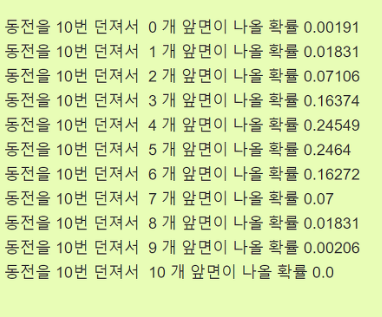

In [227]:
import random

class Coin_Prob():

    def __init__(self):
        coin = ['front', 'back']
        cnt = 0
        print('동전 던지기를 시작하겠습니다.')
        
        for e in range(1, 10000):
            a=[]
            for i in range(1, 11):
                result = random.choice(coin)
                
                if result == 'front':
                    cnt += 1
                print(f"동전을 10 번 던져서 {i}개 앞면이 나올 확률{cnt/10000}")

Coin_Prob()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
동전을 10 번 던져서 8개 앞면이 나올 확률1.7644
동전을 10 번 던져서 9개 앞면이 나올 확률1.7645
동전을 10 번 던져서 10개 앞면이 나올 확률1.7646
동전을 10 번 던져서 1개 앞면이 나올 확률1.7646
동전을 10 번 던져서 2개 앞면이 나올 확률1.7646
동전을 10 번 던져서 3개 앞면이 나올 확률1.7647
동전을 10 번 던져서 4개 앞면이 나올 확률1.7647
동전을 10 번 던져서 5개 앞면이 나올 확률1.7648
동전을 10 번 던져서 6개 앞면이 나올 확률1.7648
동전을 10 번 던져서 7개 앞면이 나올 확률1.7648
동전을 10 번 던져서 8개 앞면이 나올 확률1.7648
동전을 10 번 던져서 9개 앞면이 나올 확률1.7649
동전을 10 번 던져서 10개 앞면이 나올 확률1.7649
동전을 10 번 던져서 1개 앞면이 나올 확률1.765
동전을 10 번 던져서 2개 앞면이 나올 확률1.765
동전을 10 번 던져서 3개 앞면이 나올 확률1.7651
동전을 10 번 던져서 4개 앞면이 나올 확률1.7651
동전을 10 번 던져서 5개 앞면이 나올 확률1.7651
동전을 10 번 던져서 6개 앞면이 나올 확률1.7651
동전을 10 번 던져서 7개 앞면이 나올 확률1.7651
동전을 10 번 던져서 8개 앞면이 나올 확률1.7652
동전을 10 번 던져서 9개 앞면이 나올 확률1.7652
동전을 10 번 던져서 10개 앞면이 나올 확률1.7652
동전을 10 번 던져서 1개 앞면이 나올 확률1.7653
동전을 10 번 던져서 2개 앞면이 나올 확률1.7654
동전을 10 번 던져서 3개 앞면이 나올 확률1.7655
동전을 10 번 던져서 4개 앞면이 나올 확률1.7655
동전을 10 번 던져서 5개 앞면이 나올 확률1.7656
동전을 10 번 던져서 6개 앞면이 나올 확률1.7656
동전을 10 번 던져서 7개 앞면이 나올 확률1.7657
동전을

KeyboardInterrupt: ignored

In [183]:
import random

print("앞면의 확률을 알아봅시다!")

want_num = int(input("몇번의 앞면의 확률을 알고 싶습니까?: "))
cont_num = int(input("몇번 던져보고 싶습니까?: "))

class Coin_Prob():

    def __init__(self, num):
        coin = ['front', 'back']
        cnt = 0
        print('동전 던지기를 시작하겠습니다.')
        
        for e in range(1, 10000):
            a=[]
            for i in range(1, cont_num+1):
                result = random.choice(coin)
                a.append(result)
                
            if a.count('front') == num:
                cnt += 1
        print(f"동전을 {cont_num}번 던져서 {want_num}개 앞면이 나올 확률{cnt/10000}")

Coin_Prob(want_num)

앞면의 확률을 알아봅시다!
몇번의 앞면의 확률을 알고 싶습니까?: 5
몇번 던져보고 싶습니까?: 10
동전 던지기를 시작하겠습니다.
동전을 10번 던져서 5개 앞면이 나올 확률0.2525
